<a href="https://colab.research.google.com/github/bhushanyadav07/Data-Analyst/blob/master/Exploring_Weather_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring Weather Trends - Project 1 

##Summary

In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

Accessing the Dataset using SQL queries and getting the data.


```
SELECT year, avg_temp
FROM city_data
WHERE city = 'Pune';
```



Also getting the global data.

```
select * from global_data
```



##Importing some Essential Dependencies/Libraries

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


In [2]:
#load the dataset
df_global = pd.read_csv('/content/global_data.csv')
print(df_global.head())
print('* '*50)
df_pune = pd.read_csv('/content/results.csv')
print(df_pune.head())

   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
   year  avg_temp
0  1796     24.39
1  1797     25.17
2  1798     24.05
3  1799     24.68
4  1800     24.67


##Exploring the Data

In [3]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [4]:
df_pune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      218 non-null    int64  
 1   avg_temp  211 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


***observations** - using the info() methods we can see there are 2 col having different dtype with non-null values

Checking the Missing data

In [5]:
df_pune[df_pune.avg_temp.isnull()]

,year,avg_temp
12,1808,NaN
13,1809,NaN
14,1810,NaN
15,1811,NaN
16,1812,NaN
67,1863,NaN
68,1864,NaN


#### Finding the Missing values present in the pune's dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


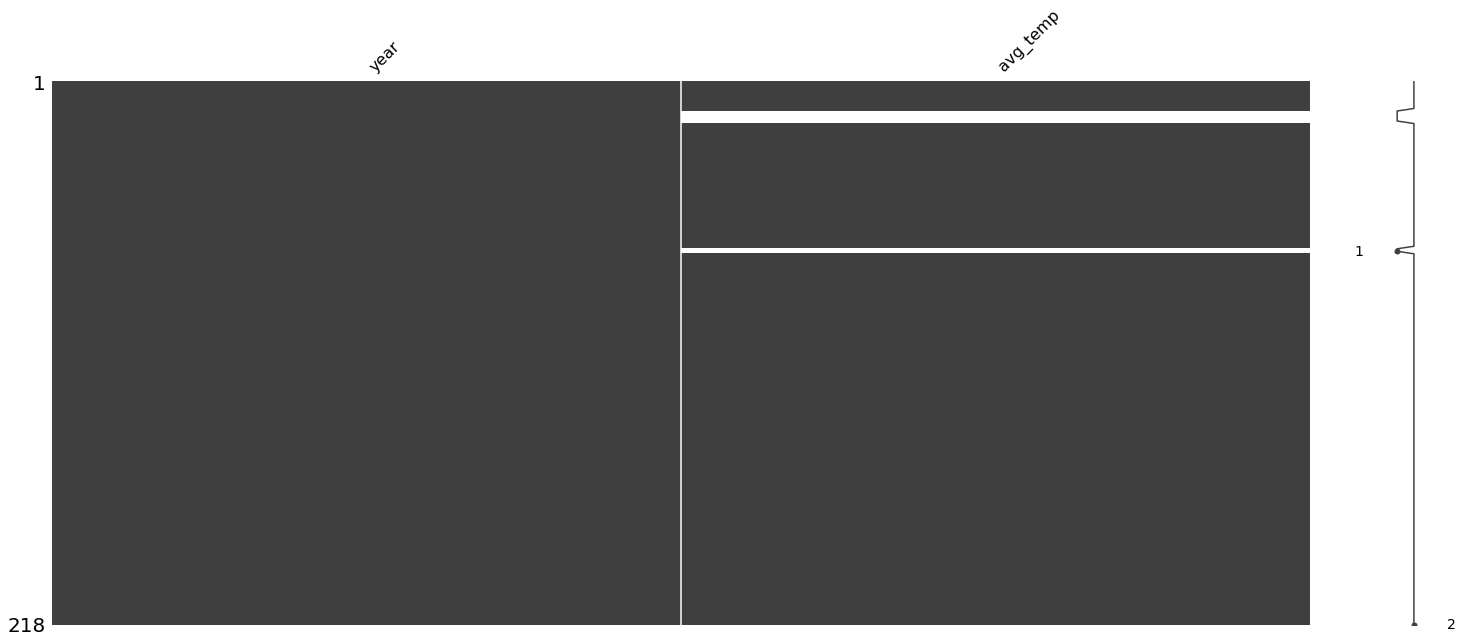

In [6]:
#visualize missing data
import missingno as mgo
#plot missing values
mgo.matrix(df_pune) 

In [7]:
#caluclate missing values in the "avg_temp" column
missing_data = df_pune["avg_temp"].isna()
sum(missing_data)

7

There are 7 missing values in the avg_data

In [0]:
#as per our data removing the all values lower than 1864
df_clean_pune = df_pune[df_pune.year > 1864]
df_clean_pune = df_clean_pune.reset_index(drop=True)

In [9]:
df_clean_pune.isnull().sum()

year        0
avg_temp    0
dtype: int64

#### Now there are no missing value present in the avg_temp

In [0]:
#taking all the data to new variables
pune2 = df_pune.copy()
global2 = df_global.copy()

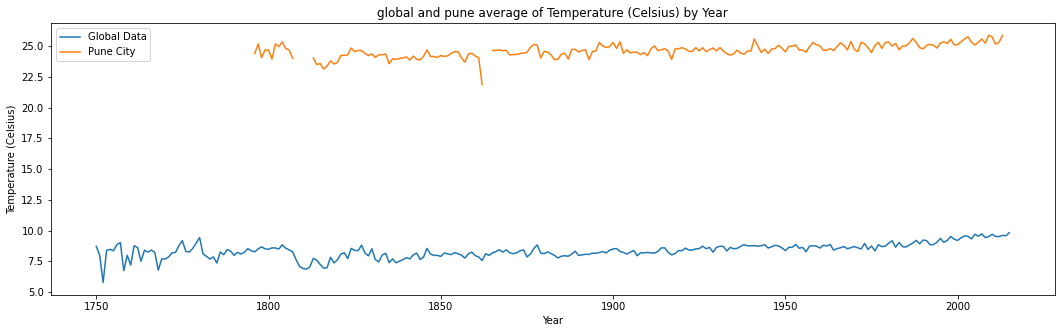

In [24]:
fig=plt.figure(figsize=(18,5))
plt.plot(df_global['year'], df_global['avg_temp'],label = 'Global Data')
plt.plot(df_pune['year'], df_pune['avg_temp'],label = 'Pune City')
plt.legend()
plt.title('Global and pune average of Temperature (Celsius) by Year')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)');

**Observation** - 1. compare to global temperature (celsius) pune is pretty hotter than the global average.\
2.as we can see at the temp slightly increses on year of 2000. \
3.There is difference in between both about 12 degree celsius. \
4.The temperature incresing scale by 2.5 degree celsius in both cases.

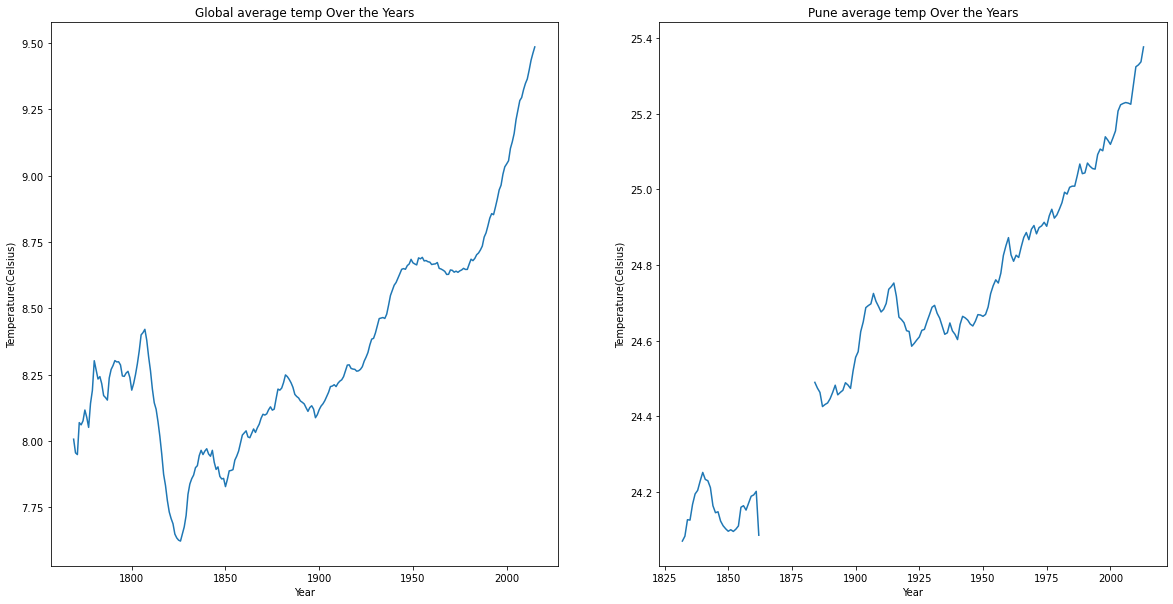

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(df_global['year'], df_global['avg_temp'].rolling(20).mean())
plt.xlabel('Year')
plt.ylabel('Temperature(Celsius)')
plt.title('Global average temp Over the Years')



plt.subplot(1,2,2)
plt.plot(df_pune['year'], df_pune['avg_temp'].rolling(20).mean())
plt.xlabel('Year')
plt.ylabel('Temperature(Celsius)')
plt.title('Pune average temp Over the Years');

**Obervation** - 1.ok as we can see in the global temperature/city temperature is not stable, the both temperature increased over the years. \
2.The global temp is lowest 7.75 degree celsius and getting higher around 10 degree celsius. \
3.Also above graph show pune local is lowest 24 degree celsius and also getting higher to 26 degree celsius.

lets see in details

In [13]:
#combining these two datasets
final_df = pd.merge(pune2, global2, how = 'inner', on = ['year'])
print(final_df.shape)
print('* '*50)
print(final_df.tail())


(218, 3)
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
     year  avg_temp_x  avg_temp_y
213  2009       25.87        9.51
214  2010       25.75        9.70
215  2011       25.16        9.52
216  2012       25.30        9.51
217  2013       25.85        9.61


In [0]:
#chenging their attributs names
final_df.rename(columns = {'avg_temp_x': 'avg_temp_pune'}, inplace = True)
final_df.rename(columns = {'avg_temp_y': 'avg_temp_global'}, inplace = True)

In [15]:
print(final_df.tail())

     year  avg_temp_pune  avg_temp_global
213  2009          25.87             9.51
214  2010          25.75             9.70
215  2011          25.16             9.52
216  2012          25.30             9.51
217  2013          25.85             9.61


**Observation** - As we can see we merge two datasets into final dataframe and also changing their attributes names and printing last 5 records.

In [0]:
avg_temp_pune = final_df['avg_temp_pune'].rolling(20).mean()
avg_temp_global = final_df['avg_temp_global'].rolling(20).mean()

*--->Calculating the temperatures moving averages throughout the years for your nearest local city from the data and the global temperatures moving average*

Text(0.5, 1.0, 'Minimum Temperature Respective Year')

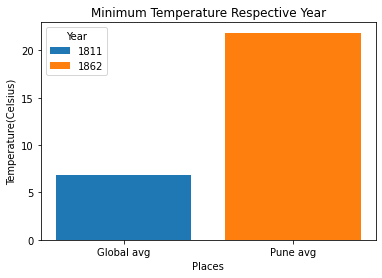

In [17]:
#avg_temp_global with resp year
global_min = str(int(final_df.loc[final_df['avg_temp_global'].idxmin()]['year']))
#avg_temp_pune with resp year
pune_min = str(int(final_df.loc[final_df['avg_temp_pune'].idxmin()]['year']))


plt.bar('Global avg', final_df.avg_temp_global.min())
plt.bar('Pune avg', final_df.avg_temp_pune.min())
plt.legend([global_min, pune_min], title='Year')
plt.ylabel('Temperature(Celsius)')
plt.xlabel('Places')
plt.title('Minimum Temperature Respective Year')

**Obervations** - 1. In the minimum average temperature bar chart showing temperature from the years 1811 to 1862. as we can see pune city avg temp show us it increses more than global temp in between 1811 to 1862.



Text(0.5, 1.0, 'Maximum Temperature Respective Year')

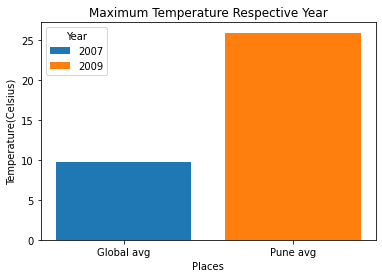

In [18]:
#avg_temp_global with resp year
global_max = str(int(final_df.loc[final_df['avg_temp_global'].idxmax()]['year']))
#avg_temp_pune with resp year
pune_max = str(int(final_df.loc[final_df['avg_temp_pune'].idxmax()]['year']))


plt.bar('Global avg', final_df.avg_temp_global.max())
plt.bar('Pune avg', final_df.avg_temp_pune.max())
plt.legend([global_max, pune_max], title='Year')
plt.ylabel('Temperature(Celsius)')
plt.xlabel('Places')
plt.title('Maximum Temperature Respective Year')

**observation** - 1.Also in the above chart shows the temp in 2007 to 2009 shows similar to the minimum temp.
2. But global temp slightly increses as compared to minimum temperature.

**From the 1864 to 2013 how much data have increaded we will see through the graph

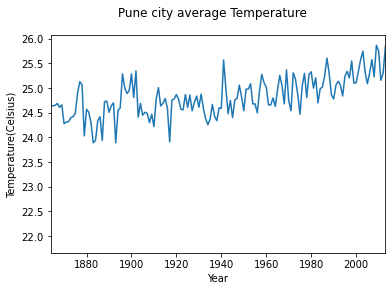

In [19]:

plt.xlim([1864,2013])
plt.plot(final_df.year,final_df.avg_temp_pune)
plt.suptitle("Pune city average Temperature")
plt.xlabel('Year')
plt.ylabel('Temperature(Celsius)');

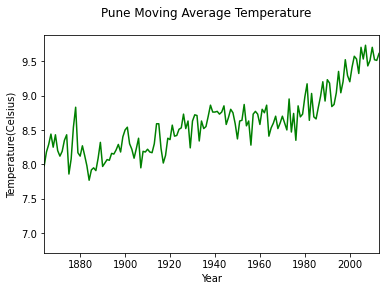

In [20]:
plt.xlim([1864,2013])
plt.plot(final_df.year,final_df.avg_temp_global, c = 'green')
plt.suptitle("Pune Moving Average Temperature")
plt.xlabel('Year')
plt.ylabel('Temperature(Celsius)');

**Observation** - 1.According to the years from [1864,2013] for pune and global They both graph shows pune city temperature are much higher than global temperature.\
2. Also they both have common increasing scale by 0.5 degree celsius from 1864 to 2013.


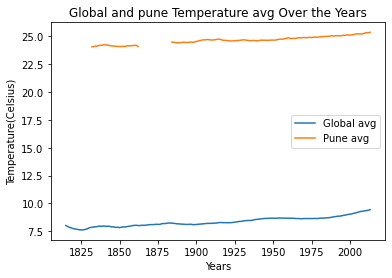

In [21]:
plt.plot(final_df['year'], avg_temp_global, label='Global avg')
plt.plot(final_df['year'], avg_temp_pune, label='Pune avg')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Temperature(Celsius)')
plt.title('Global and pune Temperature avg Over the Years');

**Obervations** - 1. In the both temp as we can see there is difference about 13 degree celcious. \
2.from 1975 year the global temperature is increased by 2 degree celsius and the pune local temperature might increased by est 0.3 degree celsius. \
3.the global temperature getting little hotter than the local pune.
